# Attribute Inference Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from os.path import join as osj
import pandas as pd
import seaborn as sns
import random
import pickle
import os


attack = "AIA"

In [2]:
def read_intra_attack_setups():
    intra_setups = pd.read_csv('../results_dp/attack_setup_intra.csv')
    return intra_setups

def read_inter_attack_setups():
    inter_setups = pd.read_csv('../results_dp/attack_setup_inter.csv')
    return inter_setups

def get_attack_setups():
    """
    Loads the attack setups for intra and inter patient attacks.

    Returns:
        dict_all_setups: dict with structure {model: {epsilon: [delta]}}
    """

    # intra
    intra_setups = read_intra_attack_setups()
    intra_setups = intra_setups.sort_values(by=["Model", "Epsilon", "Delta"], ascending=False)
    intra_setups["Model"] = intra_setups["Model"].str.replace("Intra-", "", regex=False)

    # inter
    inter_setups = read_inter_attack_setups()
    inter_setups = inter_setups.sort_values(by=["Model", "Epsilon", "Delta"], ascending=False)
    inter_setups["Model"] = inter_setups["Model"].str.replace("Inter-", "", regex=False)

    # all
    all_setups = pd.concat([intra_setups, inter_setups], axis=0)
    all_setups.drop_duplicates(inplace=True, ignore_index=True)
    all_setups = all_setups.sort_values(by=["Model", "Epsilon", "Delta"], ascending=False)

    # dict
    dict_all_setups = {}
    for _, row in all_setups.iterrows():
        model = row["Model"]
        epsilon = row["Epsilon"]
        delta = row["Delta"]
        
        if model not in dict_all_setups:
            dict_all_setups[model] = {}
        if epsilon not in dict_all_setups[model]:
            dict_all_setups[model][epsilon] = []
        
        dict_all_setups[model][epsilon].append(delta)

    return dict_all_setups

def load_attack_performance(attack):    
    with open(osj("..", "results_attacks", f"{attack}_performance.pkl"), "rb") as f:
        metrics = pickle.load(f) 
    return metrics

In [3]:
dict_all_setups = get_attack_setups()

In [4]:
dict_all_setups

{'laplace': {0.91: [0.6, 0.0],
  0.81: [1.0, 0.0],
  0.71: [0.0],
  0.61: [0.6, 0.2, 0.0],
  0.51: [0.0],
  0.081: [1.0, 0.7],
  0.071: [0.7, 0.0],
  0.061: [0.0],
  0.051: [0.8],
  0.041: [0.9, 0.0],
  0.031: [0.1, 0.0],
  0.021: [0.1, 0.0],
  0.01: [0.1, 0.0],
  0.001: [0.1, 0.0]},
 'gaussian_a': {0.81: [0.9, 0.8],
  0.71: [0.8, 0.5, 0.2],
  0.61: [0.9, 0.3],
  0.51: [0.8],
  0.41: [0.2],
  0.091: [0.4],
  0.081: [1.0],
  0.071: [1.0],
  0.051: [0.8],
  0.041: [0.1],
  0.01: [0.8, 0.5],
  0.001: [0.8]},
 'bounded_n': {0.91: [0.2],
  0.31: [0.2],
  0.21: [0.2],
  0.11: [0.3, 0.1],
  0.081: [0.2],
  0.071: [0.4, 0.2],
  0.021: [0.4, 0.1],
  0.01: [0.4, 0.1]}}

In [6]:
aia_metrics = load_attack_performance(attack)
aia_metrics

{'laplace': {0.91: {0.6: {'gender': {'acc': 0.6,
     'rec': 0.6,
     'pre': 0.6,
     'f1': 0.6,
     'mae': 0.4,
     'mse': 0.4,
     'r2': -0.6000000000000001},
    'age': {'acc': 0.5,
     'rec': 0.3333333333333333,
     'pre': 0.16666666666666666,
     'f1': 0.2222222222222222,
     'mae': 0.5,
     'mse': 0.5,
     'r2': -0.21951219512195141}},
   0.0: {'gender': {'acc': 0.6,
     'rec': 0.6,
     'pre': 0.6,
     'f1': 0.6,
     'mae': 0.4,
     'mse': 0.4,
     'r2': -0.6000000000000001},
    'age': {'acc': 0.4,
     'rec': 0.26666666666666666,
     'pre': 0.14814814814814814,
     'f1': 0.19047619047619047,
     'mae': 0.6,
     'mse': 0.6,
     'r2': -0.46341463414634165}}},
  0.81: {1.0: {'gender': {'acc': 0.7,
     'rec': 0.8,
     'pre': 0.6666666666666666,
     'f1': 0.7272727272727273,
     'mae': 0.3,
     'mse': 0.3,
     'r2': -0.19999999999999996},
    'age': {'acc': 0.2,
     'rec': 0.13333333333333333,
     'pre': 0.09523809523809523,
     'f1': 0.111111111111111

In [7]:
# could not be computed, due to not found data
# 0.01: {0.1: {'gender': None, 'age': None}}},
del aia_metrics["bounded_n"][0.01]

In [7]:
rows = []

for mechanism, epsilons in aia_metrics.items():
    if mechanism =="no_dp":
        for target, metrics in epsilons.items():
            for metric_name, value in metrics.items():
                        row = {
                            'Mechanism': mechanism,
                            'Epsilon': None,
                            'Delta': None,
                            'Metric': metric_name,
                            'Target': target,
                            'Value': value
                        }
                        rows.append(row)
    else:
        for epsilon, deltas in epsilons.items():
            for delta, targets in deltas.items():
                for target, metrics in targets.items():
                    for metric_name, value in metrics.items():
                        row = {
                            'Mechanism': mechanism,
                            'Epsilon': epsilon,
                            'Delta': delta,
                            'Metric': metric_name,
                            'Target': target,
                            'Value': value
                        }
                        rows.append(row)

df = pd.DataFrame(rows)

In [8]:
df

,Mechanism,Epsilon,Delta,Metric,Target,Value
0,laplace,0.91,0.6,acc,gender,0.600000
1,laplace,0.91,0.6,rec,gender,0.600000
2,laplace,0.91,0.6,pre,gender,0.600000
3,laplace,0.91,0.6,f1,gender,0.600000
4,laplace,0.91,0.6,mae,gender,0.400000
...,...,...,...,...,...,...
751,no_dp,NaN,NaN,pre,age,0.095238
752,no_dp,NaN,NaN,f1,age,0.111111
753,no_dp,NaN,NaN,mae,age,0.800000
754,no_dp,NaN,NaN,mse,age,0.800000


In [9]:
# fill epsilon and delta with 0.0 for no_dp
df['Epsilon'] = df['Epsilon'].fillna(0.0)
df['Delta'] = df['Delta'].fillna(0.0)

In [10]:
df_pivoted = df.pivot_table(index=['Mechanism', 'Epsilon', 'Delta', 'Metric'], 
                            columns='Target', 
                            values='Value', 
                            aggfunc='first').reset_index()

df_pivoted.columns = ['Mechanism', 'Epsilon', 'Delta', 'Metric', 'Gender', 'Age']

df_pivoted

,Mechanism,Epsilon,Delta,Metric,Gender,Age
0,bounded_n,0.021,0.1,acc,0.500000,0.500000
1,bounded_n,0.021,0.1,f1,0.222222,0.285714
2,bounded_n,0.021,0.1,mae,0.500000,0.500000
3,bounded_n,0.021,0.1,mse,0.500000,0.500000
4,bounded_n,0.021,0.1,pre,0.166667,0.500000
...,...,...,...,...,...,...
373,no_dp,0.000,0.0,mae,0.800000,0.300000
374,no_dp,0.000,0.0,mse,0.800000,0.300000
375,no_dp,0.000,0.0,pre,0.095238,0.666667
376,no_dp,0.000,0.0,r2,-0.951220,-0.200000


In [11]:
df_f1 = df_pivoted[df_pivoted['Metric'] == 'f1']

In [30]:
df_f1.sort_values(by=['Mechanism', 'Epsilon', 'Delta'], ascending=False, inplace=True)
df_f1

/tmp/ipykernel_3391970/1870653670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f1.sort_values(by=['Mechanism', 'Epsilon', 'Delta'], ascending=False, inplace=True)


,Mechanism,Epsilon,Delta,Metric,Gender,Age
372,no_dp,0.000,0.0,f1,0.111111,0.727273
365,laplace,0.910,0.6,f1,0.222222,0.600000
358,laplace,0.910,0.0,f1,0.190476,0.600000
351,laplace,0.810,1.0,f1,0.111111,0.727273
344,laplace,0.810,0.0,f1,0.222222,0.444444
337,laplace,0.710,0.0,f1,0.222222,0.285714
330,laplace,0.610,0.6,f1,0.222222,0.400000
323,laplace,0.610,0.2,f1,0.238095,0.500000
316,laplace,0.610,0.0,f1,0.222222,0.000000
309,laplace,0.510,0.0,f1,0.153846,0.000000


In [27]:
models_s = np.sort(models)
models_s

array(['bounded_n', 'gaussian_a', 'laplace'], dtype=object)

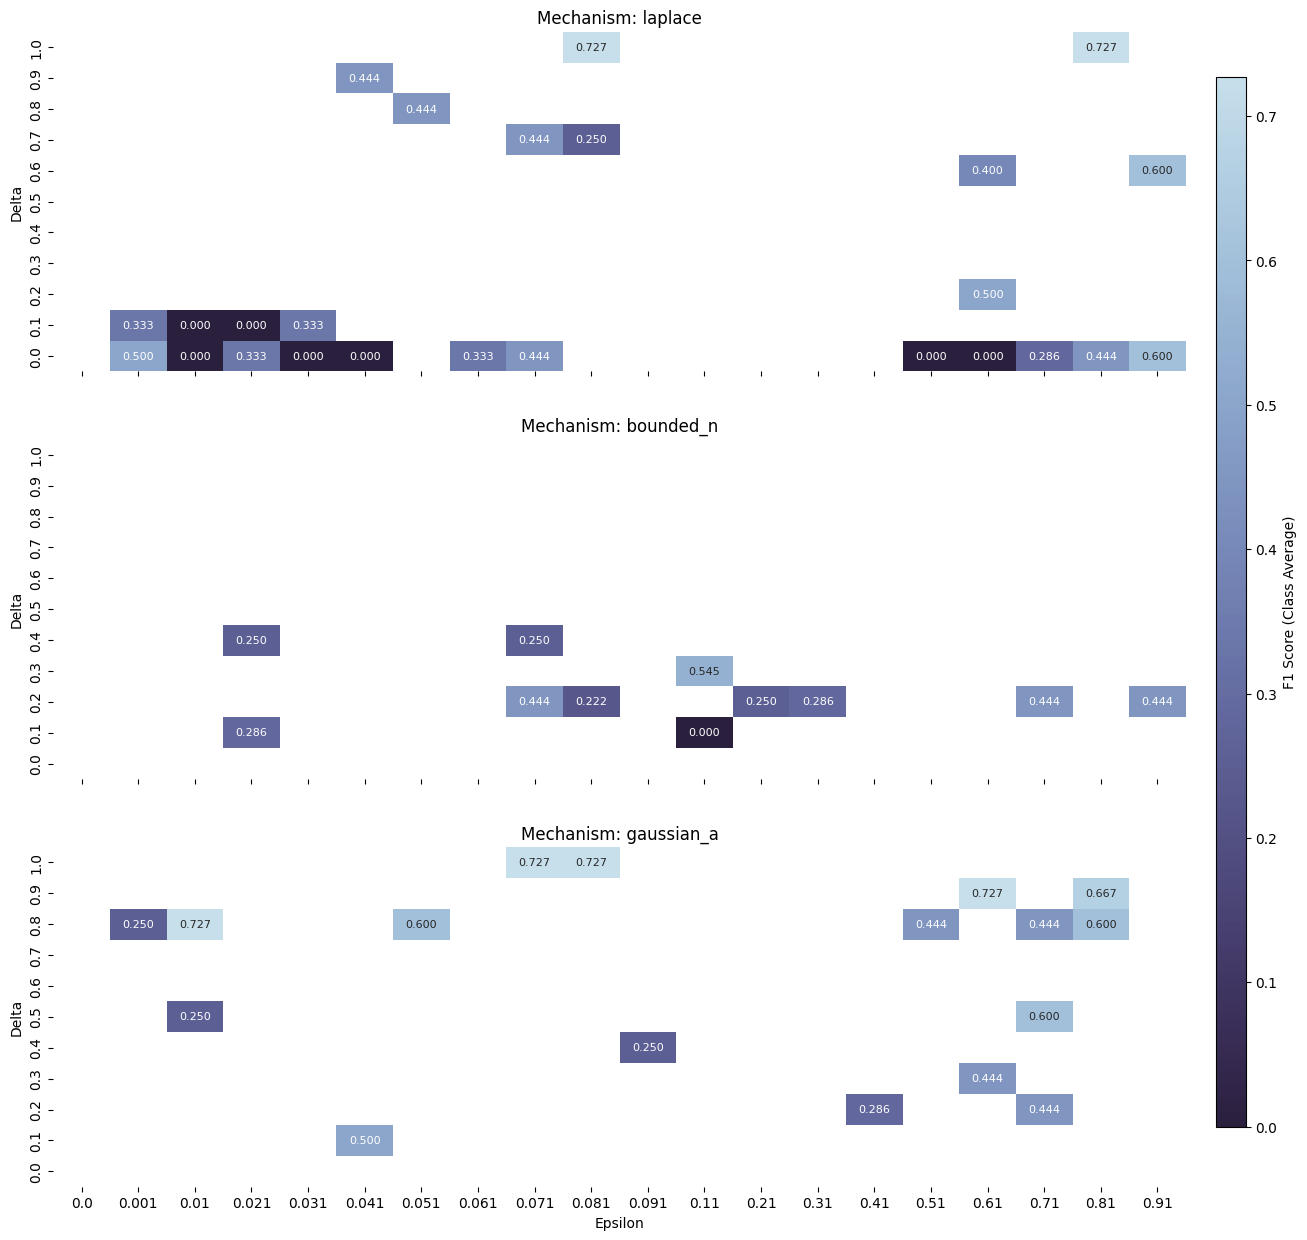

In [33]:
# Get unique Model, Epsilon and Delta
models = ["laplace", "bounded_n", "gaussian_a"]
epsilon_order = sorted(df_f1["Epsilon"].unique())
delta_order = sorted(df_f1["Delta"].unique(), reverse=True)

fig, axes = plt.subplots(len(models), 1, figsize=(15, 5 * len(models)), sharex=True)

# Normalize color scale across all models
vmin = df_f1["Age"].min()
vmax = df_f1["Age"].max()

from matplotlib.cm import ScalarMappable
import matplotlib as mpl
# cmap = sns.color_palette("light:#5A9_r", as_cmap=True)
cmap = sns.color_palette("ch:s=.25,rot=-.25_r", as_cmap=True)
# cmap = sns.color_palette("dark:#5A9", as_cmap=True)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap=cmap)

for i, model in enumerate(models):
    model_df = df_f1[df_f1["Mechanism"] == model]

    # Create pivot table for heatmap: rows = Delta, columns = Epsilon, values = class_average
    pivot_table = model_df.pivot_table(
        index="Delta",
        columns="Epsilon",
        values="Age"
    ).reindex(index=delta_order, columns=epsilon_order)

    sns.heatmap(
        pivot_table,
        ax=axes[i],
        annot=True,
        fmt=".3f",
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=False,
        annot_kws={"size": 8}
    )

    axes[i].set_title(f"Mechanism: {model}")
    axes[i].set_ylabel("Delta")
    if i == len(models) - 1:
        axes[i].set_xlabel("Epsilon")
    else:
        axes[i].set_xlabel("")
        axes[i].set_xticklabels([]) 


plt.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7]) 
fig.colorbar(sm, cax=cbar_ax).set_label("F1 Score (Class Average)")

# plt.tight_layout()
plt.show()
